# Coursera - Data analysis
## Introduction
Coursera is an online education platform that offers numerous courses in several areas. Having a large number of educators and users it is essential to analyze and understand the dynamics of ratings, student numbers and course types.
This analysis focuses on exploring various aspects of the course data to gain insights into student preferences, course distributions and ratings.
## Objective
The primary goal of this analysis is to find ways to attract more students for the Coursera platform by exploring and visualizing the relationships between different attributes of Coursera courses.
## Importing libraries and dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

coursera_data = pd.read_csv("/Users/adriennficsor/Desktop/Turing/M4S3/coursea_data.csv", index_col=0)

In [3]:
coursera_data.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


## Data cleaning
- Handling missing values
- Handling duplicates
- Checking for outliers

### General overview of the dataset

In [4]:
coursera_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


The dataset contains 891 data entries and 7 columns. There are no null values in the dataset.

In [5]:
# Checking the duplicates
coursera_data.duplicated().sum()

0

There are no duplicates in the dataset.

In [6]:
# More detailed info about the object types:
info_object = coursera_data.describe(include=["object"]).transpose()
info_object

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


Some initial insights:
- There are a few not unique titles
- 154 organizations provide courses on the platform
- University of Pennsylvania has the most courses (59)
- There are only 3 certificate types, Course is the most common (more than half of the courses)
- The courses are available in 4 different diffculty levels, Beginner is the most common
- The most common student number is around 120k

In [7]:
# More detailed info about the numerical data:
info_rating = coursera_data.describe().transpose()
info_rating

,count,mean,std,min,25%,50%,75%,max
course_rating,891.0,4.677329,0.162225,3.3,4.6,4.7,4.8,5.0


/var/folders/2f/492hrw2s61984lvrqdsfrw000000gp/T/ipykernel_86137/901343972.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Course ratings')

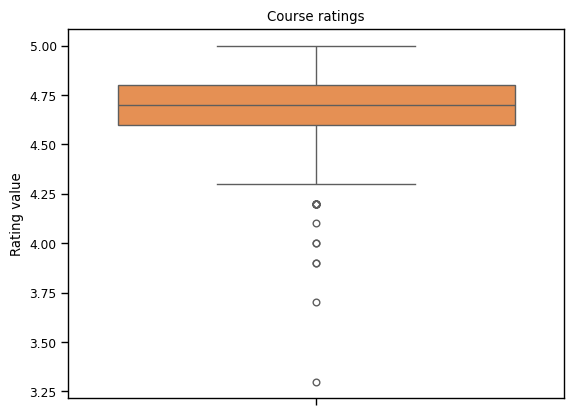

In [35]:
sns.boxplot(coursera_data["course_rating"], palette="YlOrRd")
plt.ylabel("Rating value")
plt.title("Course ratings")

- Ratings have an average value of 4.68, the ratings are in the range of 3.3 and 5.0, which is considered high rating.
- Below 4.25, the ratings are outliers, they are not going to be removed, can be important for further analysis.

# EDA
- What is the correlation between rating and enrolled students?
- What are the highest and lowest rating courses?
- What is the distribution of the courses per difficulties and certificate types?
- How does the difficulty level affect the rating?
- How does the difficulty level affect the enrollment?
- Top organizations and courses (average rating, enrollment)
- How does number of courses affect the enrollment per organization?
- Does the certificate type affect the rating?

### Course Ratings and Enrollment Numbers

Courses with higher ratings attract more students. Number of students can also depend on how new is the course.

Text(0.5, 1.0, 'Course rating per Enrolled Students and Difficulty')

<Figure size 1000x600 with 0 Axes>

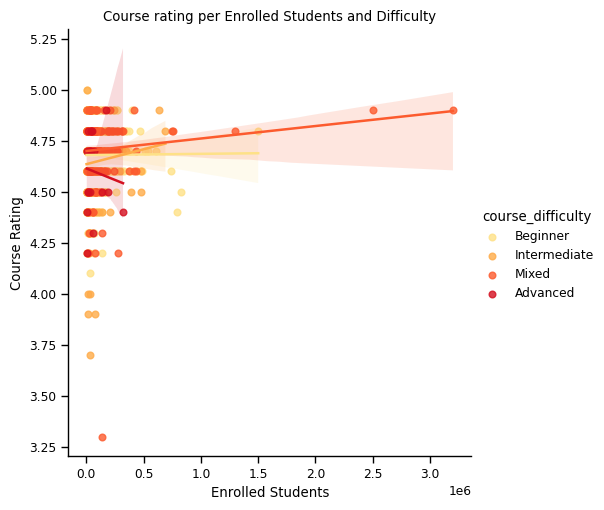

In [74]:
plt.figure(figsize=(10,6))
sns.set_context("paper")
sns.lmplot(x="course_students_enrolled", 
           y="course_rating", 
           data=coursera_data, 
           hue="course_difficulty",
           palette="YlOrRd")
plt.xlabel("Enrolled Students")
plt.ylabel("Course Rating")
plt.title("Course rating per Enrolled Students and Difficulty")

### Highest and lowest rating courses

In [9]:
max_rating = coursera_data["course_rating"].max()
best_courses = coursera_data.loc[coursera_data["course_rating"] == max_rating]
best_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5k
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6k


There are 2 courses with the maximum (5.0) rating, the only common feature in them is the similar (low) number of students enrolled.

In [10]:
min_rating = coursera_data["course_rating"].min()
worst_courses = coursera_data.loc[coursera_data["course_rating"] == min_rating]
worst_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
767,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140k


The lowest rating course has medium number of students, and has Mixed difficulty level, which might be a potential issue, if students' level is not aligned with the content.

### Number of courses by difficulties and certificates

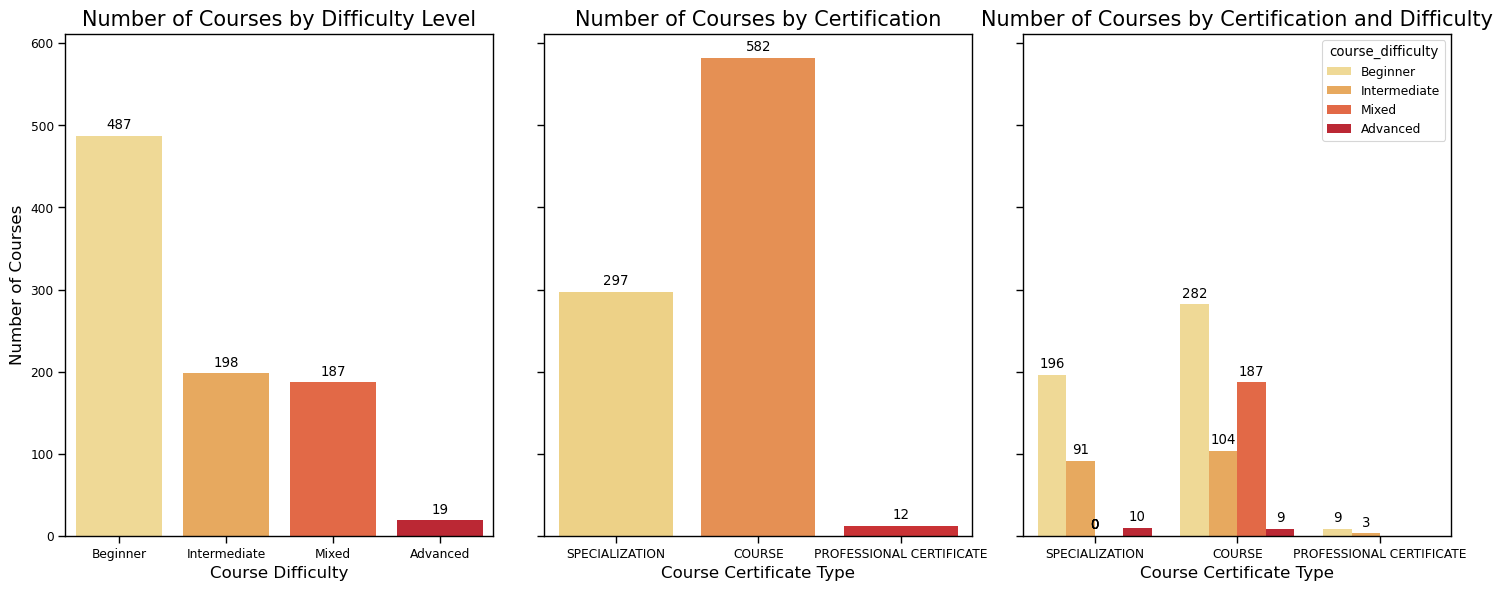

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6), sharey=True)

# Plotting the first countplot on the first subplot
sns.countplot(x="course_difficulty", 
              data=coursera_data, 
              palette="YlOrRd", 
              hue="course_difficulty", 
              ax=axes[0])
axes[0].set_xlabel('Course Difficulty', fontsize=12)
axes[0].set_ylabel('Number of Courses', fontsize=12)
axes[0].set_title('Number of Courses by Difficulty Level', fontsize=15)

# Adding the data labels:
for i in axes[0].patches:
    axes[0].annotate(str(int(i.get_height())), 
                    (i.get_x() + i.get_width() / 2., i.get_height()), 
                    ha='center',
                    xytext=(0, 5),
                    textcoords='offset points')

# Plotting the second countplot on the second subplot
sns.countplot(x="course_Certificate_type", 
              data=coursera_data, 
              palette="YlOrRd", 
              hue="course_Certificate_type", 
              ax=axes[1])
axes[1].set_xlabel('Course Certificate Type', fontsize=12)
axes[1].set_ylabel('Number of Courses', fontsize=12)
axes[1].set_title('Number of Courses by Certification', fontsize=15)

# Adding the data labels:
for i in axes[1].patches:
    axes[1].annotate(str(int(i.get_height())), 
                    (i.get_x() + i.get_width() / 2., i.get_height()), 
                    ha='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    
# Plotting the third countplot on the third subplot
sns.countplot(x="course_Certificate_type", 
              data=coursera_data, 
              palette="YlOrRd", 
              hue="course_difficulty", 
              ax=axes[2])
axes[2].set_xlabel('Course Certificate Type', fontsize=12)
axes[2].set_ylabel('Number of Courses', fontsize=12)
axes[2].set_title('Number of Courses by Certification and Difficulty', fontsize=15)

# Adding the data labels:
for i in axes[2].patches:
    axes[2].annotate(str(int(i.get_height())), 
                    (i.get_x() + i.get_width() / 2., i.get_height()), 
                    ha='center',
                    xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout for better spacing between plots
plt.tight_layout()

- About half of the courses are Beginner level
- There are very few Advanced courses
- About 2/3 are Course certificate types
- Only a few courses give Professional certifiate and it does not have Advanced and Mixed levels
- Beginner level and Course type courses have the biggest weight in the overall rating
- Other groups follow a decreasing tendency as the level is ascending

### Course Ratings and Difficulty Level

In [14]:
# Compare average course ratings across different difficulty levels
rating_mean_by_diff = coursera_data.groupby("course_difficulty")["course_rating"].mean().reset_index().sort_values(by="course_rating")
rating_mean_by_diff

,course_difficulty,course_rating
0,Advanced,4.600000
2,Intermediate,4.646465
1,Beginner,4.680903
3,Mixed,4.708556


- Mixed level courses have the highest average rating
- As the level increases, the rating decreases
- Beginner level rating is the same as the total rating (probably due to the higher number)

In [43]:
fig = px.histogram(coursera_data, x="course_difficulty", color="course_rating", 
                   barmode="group", 
                   category_orders={"course_rating": coursera_data["course_rating"].sort_values()},
                   color_discrete_sequence=px.colors.sequential.YlOrRd,
                   labels={"course_rating": "Course Rating"})
fig.update_layout(title="Rating distribution per Difficulty", 
                  xaxis_title="Difficulty level", 
                  yaxis_title="Number of courses",
                  width=1000)
fig.show()

- Beginner level has the highest peaks
- Intermediate and Advanced are more flat (at this level students have some knowledge, they can evaluate the course more critically)

### Course Enrollment and Difficulty Level

In [16]:
# Changing enrolled student data to int
students = []
for i in coursera_data["course_students_enrolled"]:
    if "k" in i:
        # Replace 'k' with '' and multiply by 1000
        new_value = float(i.replace("k","")) * 1000
    elif "m" in i:
        # Replace 'm' with '' and multiply by 1,000,000
        new_value = float(i.replace("m","")) * 1000000
    else:
        new_value = i
    students.append(int(new_value))

coursera_data["course_students_enrolled"] = students
coursera_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


In [68]:
# Calculate the average student number per difficulty level
students_by_diff = coursera_data.groupby("course_difficulty")["course_students_enrolled"].mean().reset_index()
students_by_diff["course_students_enrolled"] = students_by_diff["course_students_enrolled"].astype(int)
fig = px.bar(students_by_diff, 
             x="course_difficulty", 
             y="course_students_enrolled", 
             color="course_difficulty",
             color_discrete_sequence=px.colors.sequential.YlOrRd,
             text="course_students_enrolled")

fig.update_layout(
    title="Average Number of Students by Difficulty Level", 
    xaxis_title="Course Difficulty", 
    yaxis_title="Student Number", 
    showlegend=False,
    width=800)
fig.update_traces(textposition='outside')
fig.show()

- Beginner-level courses have more students enrolled compared to intermediate or advanced courses.
- Considering the number of courses per Difficulty, the number of students is more balanced.
- The highest number of students are in the Mixed courses, a probable reason is that these courses can be fitting for different levels, so more people are interested.
- This data shows that probably there is a need for more Intermediate and Advanced courses.

### Course Enrollment and Certificate type

In [73]:
# Calculate the average student number per certificate type
students_by_cert = coursera_data.groupby("course_Certificate_type")["course_students_enrolled"].mean().reset_index()
students_by_cert["course_students_enrolled"] = students_by_cert["course_students_enrolled"].astype(int)
fig = px.bar(students_by_cert, 
             x="course_Certificate_type", 
             y="course_students_enrolled", 
             color="course_Certificate_type",
             color_discrete_sequence=px.colors.sequential.YlOrRd,
             text="course_students_enrolled")

fig.update_layout(
    title="Average Number of Students by Certificate types", 
    xaxis_title="Certificate type", 
    yaxis_title="Student Number", 
    showlegend=False,
    width=800)
fig.update_traces(textposition='outside')
fig.show()

The number of students is about 2x as much in other types, there is a high demand for these types of courses.

### Highest rated organizations

In [19]:
org_list = coursera_data.groupby("course_organization").agg(avg_rating=("course_rating","mean"),course_count=("course_title","count")).sort_values(by="avg_rating", ascending=False)
org_list.head(10)

,avg_rating,course_count
course_organization,,
Hebrew University of Jerusalem,4.900000,1
"Nanyang Technological University, Singapore",4.900000,1
Universidade Estadual de Campinas,4.900000,1
Crece con Google,4.900000,1
London Business School,4.900000,1
Google - Spectrum Sharing,4.900000,1
ScrumTrek,4.900000,1
Universidade de São Paulo,4.866667,3
The University of Chicago,4.850000,2


There are 7 organization with an average of 4.9 rating, but only 1 course.

### Most popular organizations and courses

In [21]:
popular_org = coursera_data.groupby("course_organization").agg(students=("course_students_enrolled","sum"),course_count=("course_title","count")).sort_values(by="students", ascending=False)
popular_org.head(10)


,students,course_count
course_organization,,
University of Michigan,7437700,41
University of Pennsylvania,5501300,59
Stanford University,4854000,16
"University of California, Irvine",4326000,27
Johns Hopkins University,4298900,28
Duke University,3967600,28
Yale University,3952000,17
IBM,2956400,22
deeplearning.ai,2863400,16


In [20]:
sorted_course = coursera_data.sort_values(by="course_students_enrolled", ascending=False)
sorted_course.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000


### Number of courses increases enrollment

In [22]:
popular_org.corr()

,students,course_count
students,1.000000,0.880679
course_count,0.880679,1.000000


Text(0.5, 1.0, 'Increase of students by courses of organizations')

<Figure size 1000x600 with 0 Axes>

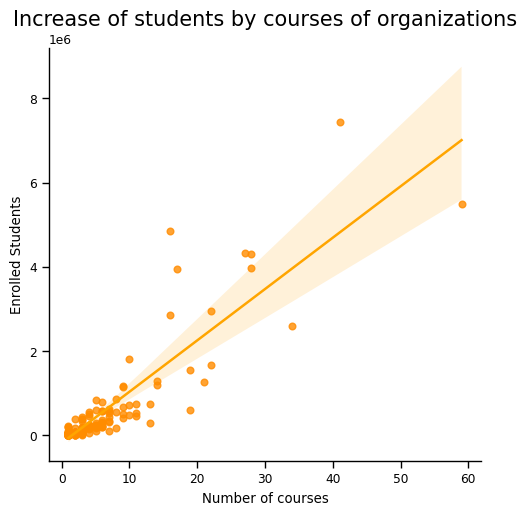

In [60]:
plt.figure(figsize=(10,6))
sns.set_context("paper")
sns.lmplot(x="course_count", 
           y="students", 
           data=popular_org, 
           line_kws={'color': 'orange'},
           scatter_kws={'color': 'darkorange'})
plt.xlabel("Number of courses")
plt.ylabel("Enrolled Students")
plt.title("Increase of students by courses of organizations", fontsize=15)

There is a strong correlation between the number of courses and the enrolled students. The more courses an organization has, the more student enrol to the courses. It is ideal to have a steeper line (increasing students without increasing courses)

### Certificate Type Distribution and Ratings

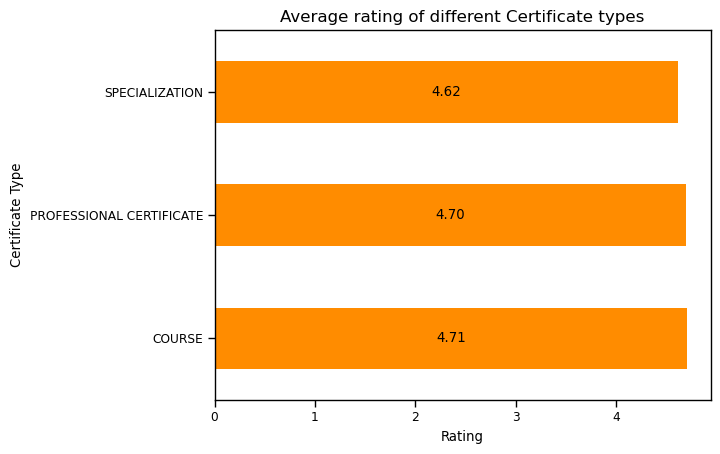

In [72]:
rating_per_cert = coursera_data["course_rating"].groupby(coursera_data["course_Certificate_type"]).mean().sort_values(ascending=False)

ax=rating_per_cert.plot.barh(color="darkorange")
plt.xlabel("Rating")
plt.ylabel("Certificate Type")
plt.title("Average rating of different Certificate types", fontsize=12)
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", label_type="center")

As mentioned before students with more knowledge and specific problems might be more critical with the course material.

Text(0.5, 1.0, 'Enrolled Students by Certificate Types')

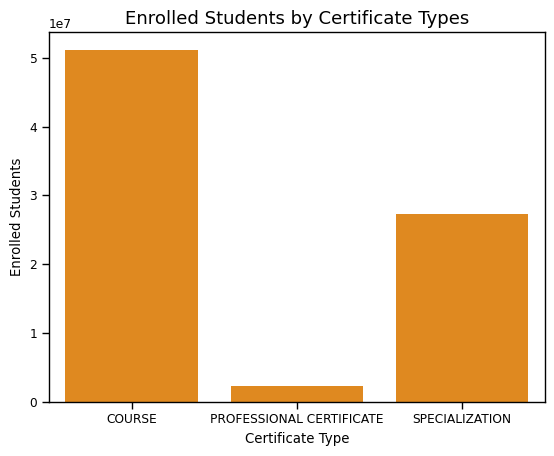

In [59]:
sns.barplot(coursera_data["course_students_enrolled"].groupby(coursera_data["course_Certificate_type"]).sum(),
            color="darkorange")
plt.xlabel("Certificate Type")
plt.ylabel("Enrolled Students")
plt.title("Enrolled Students by Certificate Types", fontsize=13)

- This result is in correlation with the number of courses per Certificate types
- There is very low number of courses with Professional certificates that causes the low number of student, even though there is higher enrollment into these courses.

# Summary

- In total there are 891 courses on the platform by 154 organizations - University of Pennsylvania has the most courses (59).
- The courses are available in 4 different difficulty levels: Beginner, Intermediate, Advanced and Mixed. Beginner takes up about half of the courses.
- There are only 3 certificate types, Course is the most common (more than half of the courses).
- There are only a few Advanced courses and courses offering a professional certificate, but on average they attract similar amount of students as lower level courses.
- It appears that high rating courses attract more students.
- Higher level courses have slightly lower ratings than beginner courses.


# Recommendation

- Add more courses with professional certificates as they have higher enrollment
- Create more higher level courses
- Encourage highly rated organizations to create more courses
- Increase availability of hot topics